In [1]:
from math import pow
from tabulate import tabulate

In [2]:
def F(x):
  return pow(x,3) - 2 * pow(x,2)

In [3]:
def dF(x):
 return 3 * pow(x,2) - 4 * x

In [4]:
def ddF(x):
 return 6 * x - 4

In [5]:
a = 2 - 4.03
b = 2 + 6.03
h = 0.1

In [6]:
def find_intersection_points(a, b, h):
    x_values = []
    y_values = []
    intersections = []

    x = a
    while x <= b:
        y = F(x)
        x_values.append(x)
        y_values.append(y)
        x += h

    table = list(zip(x_values, y_values))
    print(tabulate(table, headers=['x', 'y'], tablefmt='grid'))

    for i in range(len(x_values) - 1):
        if y_values[i] * y_values[i + 1] < 0:
            x_intersect = (x_values[i] + x_values[i + 1]) / 2
            intersections.append(x_intersect)

    return intersections


In [7]:
intersections = find_intersection_points(a, b, h)
print("Точки перетину з віссю x:", intersections)

+-------+------------+
|     x |          y |
+=======+============+
| -2.03 | -16.6072   |
+-------+------------+
| -1.93 | -14.6389   |
+-------+------------+
| -1.83 | -12.8263   |
+-------+------------+
| -1.73 | -11.1635   |
+-------+------------+
| -1.63 |  -9.64455  |
+-------+------------+
| -1.53 |  -8.26338  |
+-------+------------+
| -1.43 |  -7.01401  |
+-------+------------+
| -1.33 |  -5.89044  |
+-------+------------+
| -1.23 |  -4.88667  |
+-------+------------+
| -1.13 |  -3.9967   |
+-------+------------+
| -1.03 |  -3.21453  |
+-------+------------+
| -0.93 |  -2.53416  |
+-------+------------+
| -0.83 |  -1.94959  |
+-------+------------+
| -0.73 |  -1.45482  |
+-------+------------+
| -0.63 |  -1.04385  |
+-------+------------+
| -0.53 |  -0.710677 |
+-------+------------+
| -0.43 |  -0.449307 |
+-------+------------+
| -0.33 |  -0.253737 |
+-------+------------+
| -0.23 |  -0.117967 |
+-------+------------+
| -0.13 |  -0.035997 |
+-------+------------+
| -0.03 |  

In [8]:
x0 = 1.97
x1 = 2.07
epsilon = 1e-6

Метод Ньютона

In [9]:
def newton_method(x0, epsilon, max_iterations=1000):
    iteration = 0
    while True:
        x1 = x0 - F(x0) / dF(x0)

        error_x = abs(x1 - x0)
        error_f = abs(F(x1))

        if error_f < epsilon and error_x < epsilon or iteration >= max_iterations:
            break

        x0 = x1
        iteration += 1

    if iteration >= max_iterations:
        print("Досягнуто максимальну кількість ітерацій.")
    else:
        print("Корінь рівняння: {:.10f}".format(x1))
        print(iteration)


In [10]:
newton_method(x0, epsilon)


Корінь рівняння: 2.0000000000
2


Метод простих ітерацій

In [11]:
def Simple_Iteration(kmax, eps, x0):
    print("\nMethod simple iteration")
    x1 = x0
    tau = -1.0 / dF(x0)
    k = 0
    while True:
        x0 = x1
        x1 = x0 + tau * F(x0)
        k += 1
        error_x = abs(x1 - x0)
        error_f = abs(F(x1))

        if k > kmax or error_f < eps and error_x < eps or abs(F(x1)) <= eps:
            break

    if k > kmax:
        print("Solution not found")
    else:
        print("Solution =", x1)
        print("With iteration", k)


In [12]:
Simple_Iteration(1000, epsilon, x0)


Method simple iteration
Solution = 1.999999760080492
With iteration 4


In [13]:
def hord_method(x0, x1, epsilon, max_iterations=1000):
    iteration = 0
    while iteration < max_iterations:
        f_x0 = F(x0)
        f_x1 = F(x1)

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        error_x = abs(x1 - x0)
        error_f = abs(F(x1))

        if error_f < epsilon and error_x < epsilon:
            print("Корінь рівняння: {:.10f}".format(x2))
            print(iteration ,"ітерацій")
            return x2

        x0 = x1
        x1 = x2
        iteration += 1

    return None

In [14]:
hord_method(x0,x1,epsilon)

Корінь рівняння: 2.0000000000
4 ітерацій


2.0

In [15]:
def chebyshev_method(x0, epsilon, max_iterations=1000):
    iteration = 0
    while iteration < max_iterations:
        f_x0 = F(x0)
        df_x0 = dF(x0)
        ddf_x0 = ddF(x0)

        x1 = x0 - f_x0 / df_x0 - 0.5 * (ddf_x0 * f_x0**2) / (df_x0**3)
        error_x = abs(x1 - x0)
        error_f = abs(F(x1))

        if error_f < epsilon and error_x < epsilon:
            print("Корінь рівняння: {:.10f}".format(x1))
            print(iteration ,"ітерацій")
            return x1

        x0 = x1
        iteration += 1

    return None

In [16]:
chebyshev_method(x0,epsilon)

Корінь рівняння: 2.0000000000
2 ітерацій


2.0

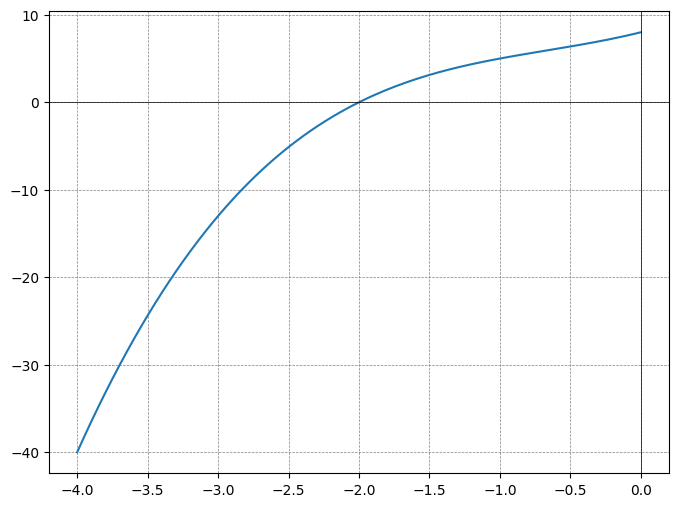

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return x**3 + 2*x**2 + 4*x + 8

x = np.linspace(-4, 0, 160)
y = F(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = x^3 + 2x^2 + 4x + 8$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()


In [18]:
def parabolic_method(F, x0, x1, x2, epsilon):
    f0, f1, f2 = F(x0), F(x1), F(x2)

    iteration = 0
    while True:
        iteration += 1

        numerator = (x1**2 - x2**2) * f0 + (x2**2 - x0**2) * f1 + (x0**2 - x1**2) * f2
        denominator = (x1 - x2) * f0 + (x2 - x0) * f1 + (x0 - x1) * f2

        x_min = 0.5 * numerator / denominator
        f_min = F(x_min)

        if abs(f_min) < epsilon or abs(x_min - x1) < epsilon:
            print(f"Root found at x = {x_min} {iteration} ітерацій")
            print(iteration ,"ітерацій")
            return x_min

        if x_min > x1:
            if f_min < f1:
                x0, x1, x2 = x1, x_min, x2
            else:
                x0, x1, x2 = x0, x1, x_min
        else:
            if f_min < f1:
                x0, x1, x2 = x0, x_min, x1
            else:
                x0, x1, x2 = x_min, x1, x2

In [19]:
x0 = 1.97
x1 = 1.98
x2 = 2.07
epsilon = 1e-6
root = parabolic_method(F, x0, x1, x2, epsilon)

Root found at x = 0.4396807028125552 26 ітерацій
26 ітерацій
